Importing Libraries 

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
data  = pd.read_csv("Telco_Customer_Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Preprocessing

In [231]:
data.drop(['customerID'],axis=1,inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [232]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


In [233]:
data.shape

(7043, 20)

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [235]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [237]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [238]:
column_name = 'TotalCharges '
mode_value = data['TotalCharges' ].mode()[0]  # Calculate the mode
data['TotalCharges' ].fillna(mode_value, inplace=True)

In [239]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Exploratory Data Analysis (EDA)

In [240]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.765853
std,0.368612,24.559481,30.090047,2266.762876
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


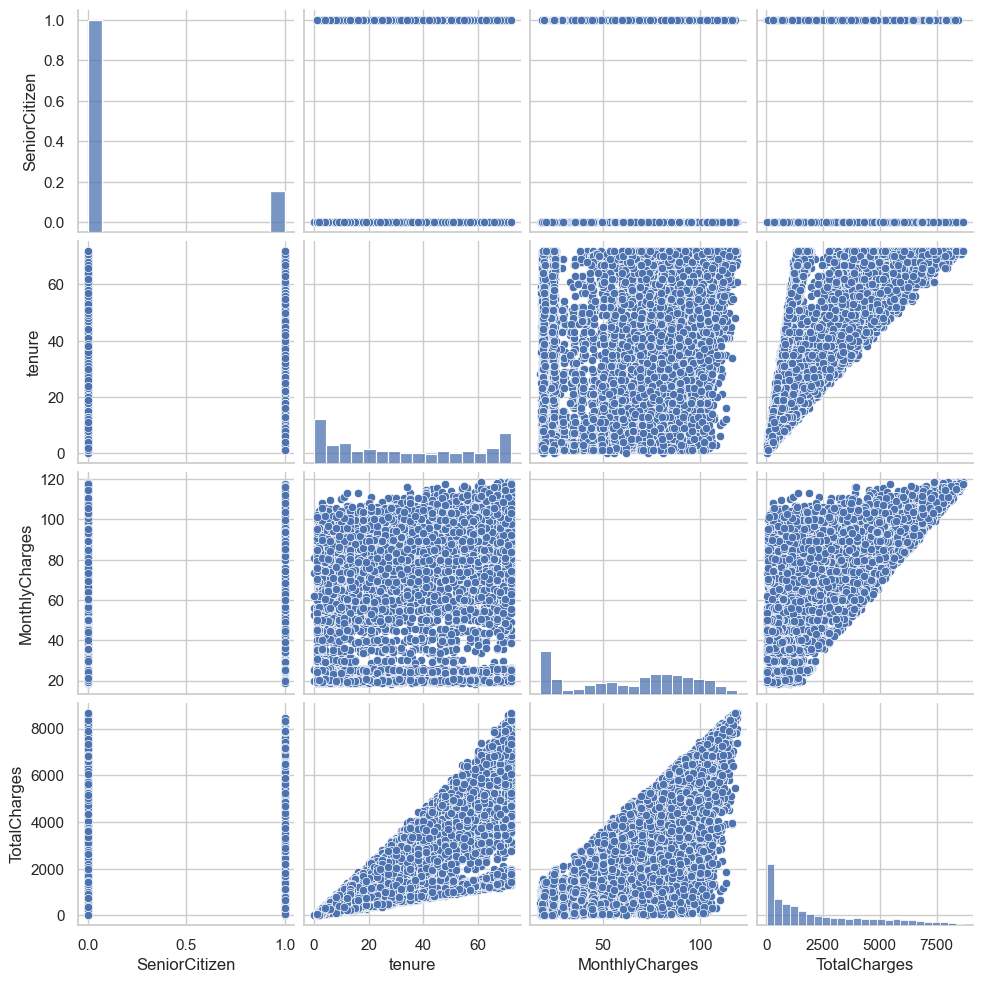

In [241]:
# Pairwise scatter plot (for numeric columns)
sns.pairplot(data)
plt.show()

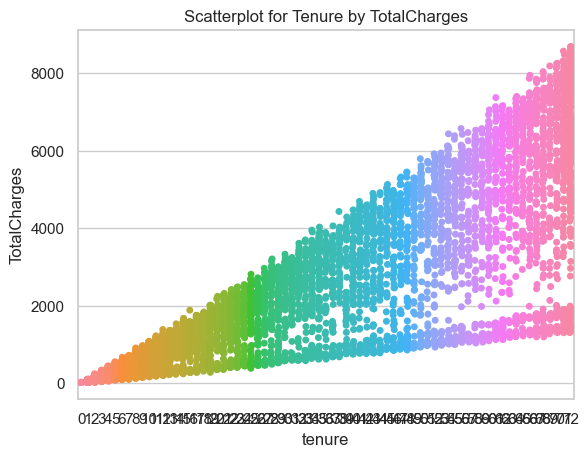

<Figure size 2500x1000 with 0 Axes>

In [242]:
# Scatterplot for Tenure by TotalCharges
sns.set(style="whitegrid")
ax = sns.stripplot(x='tenure', y='TotalCharges', data=data)
plt.title('Scatterplot for Tenure by TotalCharges')
plt.figure(figsize=(25,10))
plt.show()

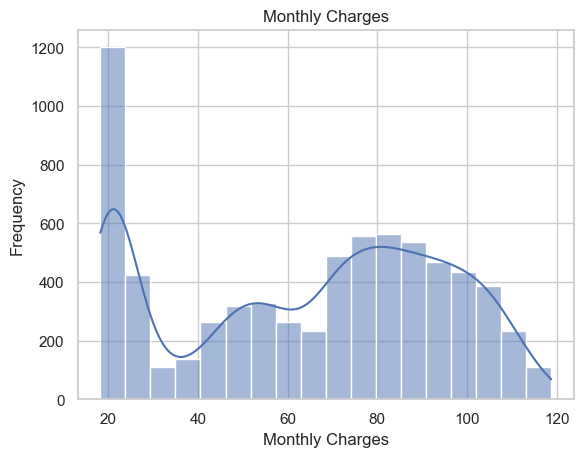

In [243]:
# Histogram for Monthly Charges
sns.histplot(data['MonthlyCharges'], kde=True)
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges')
plt.show()

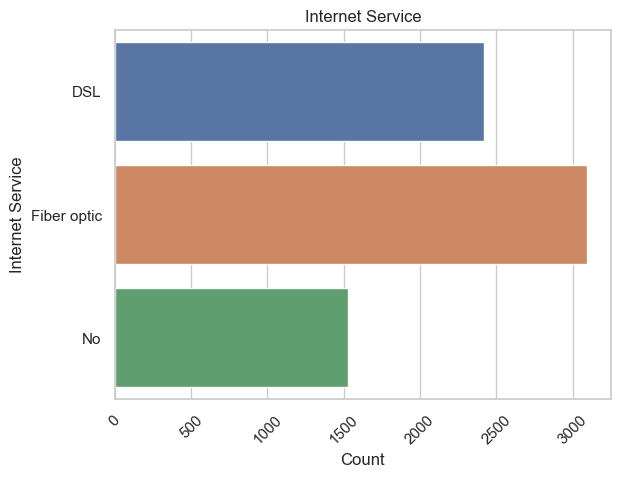

In [244]:
# Bar chart for Internet Service
sns.countplot(data=data, y='InternetService')
plt.xlabel('Count')
plt.ylabel('Internet Service')
plt.title('Internet Service')
plt.xticks(rotation=45)
plt.show()

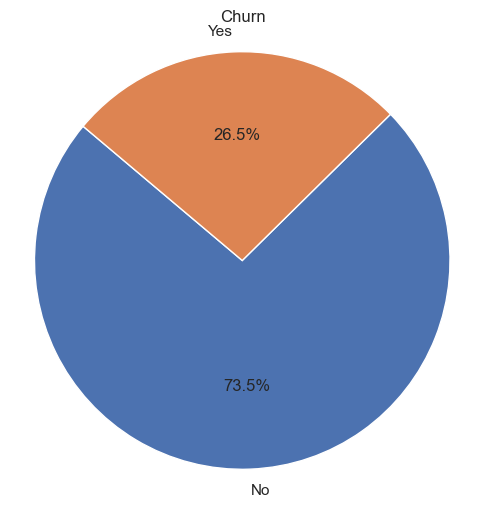

In [245]:
# Pie Chart for Churn
category_counts = data['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn')
plt.axis('equal')
plt.show()

In [246]:
data.replace(('Female', 'Male'), (0, 1), inplace=True)
data.replace(('No', 'Yes', 'No phone service'), (0, 1, 2), inplace=True)
data.replace(('No', 'DSL', 'Fiber optic'), (0, 1, 2), inplace=True)
data.replace(('Month-to-month', 'One year', 'Two year'), (0, 1, 2), inplace=True)
data.replace(('No internet service'), (3), inplace=True)
data.replace(('Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'), (0, 1, 2,3), inplace=True)

In [247]:
data.head(13)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
5,0,0,0,0,8,1,1,2,0,0,1,0,1,1,0,1,0,99.65,820.50,1
6,1,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.40,0
7,0,0,0,0,10,0,2,1,1,0,0,0,0,0,0,0,1,29.75,301.90,0
8,0,0,1,0,28,1,1,2,0,0,1,1,1,1,0,1,0,104.80,3046.05,1
9,1,0,0,1,62,1,0,1,1,1,0,0,0,0,1,0,2,56.15,3487.95,0


Feature Selection

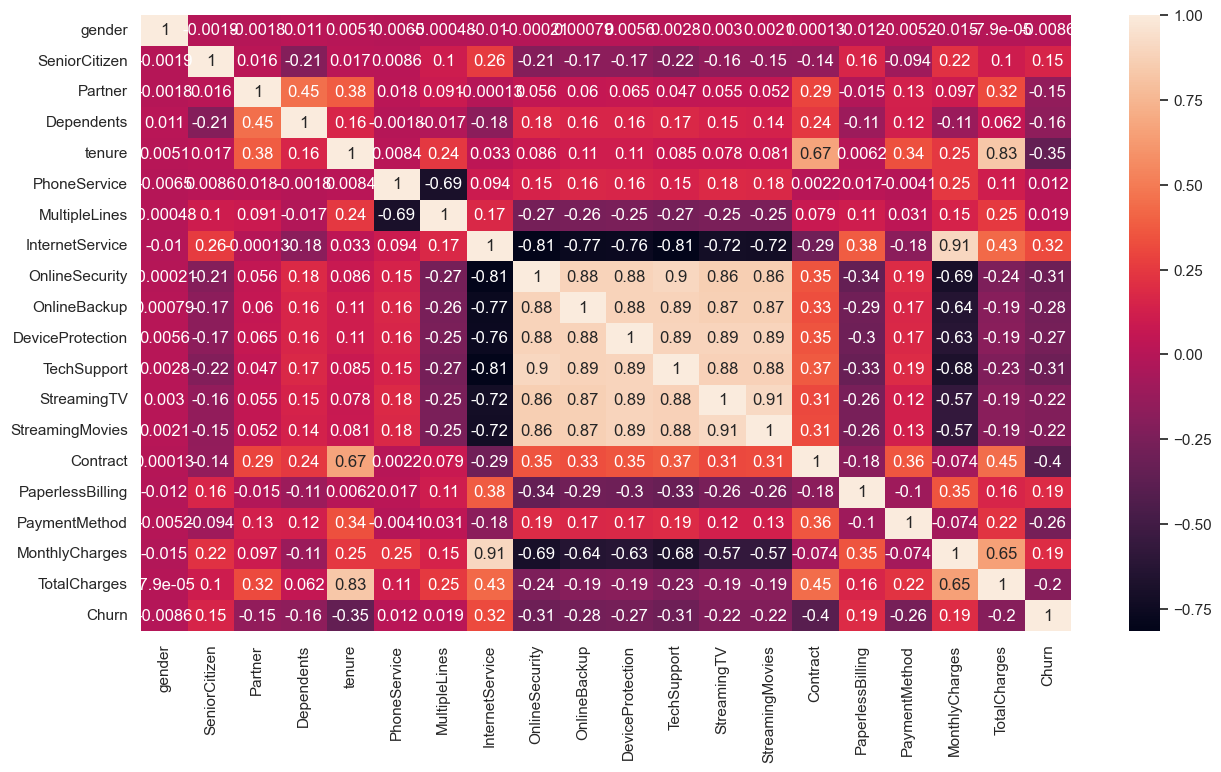

In [248]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [249]:
corrmap = data.corr()

In [250]:
data.corrwith(data["Churn"])

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.019423
InternetService     0.316846
OnlineSecurity     -0.307989
OnlineBackup       -0.280770
DeviceProtection   -0.273951
TechSupport        -0.306032
StreamingTV        -0.223123
StreamingMovies    -0.224214
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod      -0.262818
MonthlyCharges      0.193356
TotalCharges       -0.198335
Churn               1.000000
dtype: float64

In [251]:
def get_correlated_col(cor_dat, threshold):
    feature = []
    value = []

    for i, index in enumerate(cor_dat.index):
        if abs(cor_dat[index]) < threshold:
            feature.append(index)
            value.append(cor_dat[index])

    data = pd.DataFrame(data=value, index=feature, columns=['corr_value'])
    return data

# Calculate the correlated columns and store them in top_corelated_values
top_corelated_values = get_correlated_col(corrmap['Churn'], 0.2)

# Extract the feature names from top_corelated_values (index)
selected_features = top_corelated_values.index.tolist()

# Select those features from the original DataFrame df
X = data[selected_features]

# Define the target variable
y = data['Churn']

# Now you have the feature matrix X without NaN values

In [252]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,1,0,0,2,1,29.85,29.85
1,1,0,0,0,1,0,0,56.95,1889.50
2,1,0,0,0,1,0,1,53.85,108.15
3,1,0,0,0,0,2,0,42.30,1840.75
4,0,0,0,0,1,0,1,70.70,151.65
...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,84.80,1990.50
7039,0,0,1,1,1,1,1,103.20,7362.90
7040,0,0,1,1,0,2,1,29.60,346.45
7041,1,1,1,0,1,1,1,74.40,306.60


In [253]:
# splitting a dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=.2,random_state=42)

In [254]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data (compute mean and standard deviation)
scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = scaler.transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

Model Building

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [256]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [257]:
import xgboost as xgb
from xgboost import XGBClassifier

In [258]:
# Create an XGBClassifier instance
xgb_classifier = XGBClassifier()

In [259]:
# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [260]:
# Make predictions on the test data
xgb_pred = xgb_classifier.predict(X_test)

In [261]:
xgb_accuracy = accuracy_score(y_test,xgb_pred)

Logisitic Regression Algorithm

In [262]:
logistic_clf = LogisticRegression()

In [263]:
#train the classifier
logistic_clf.fit(X_train,y_train)

LogisticRegression()

In [264]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [265]:
log_accuracy = accuracy_score(y_test,logistic_predict)

Support Vector Machine

In [266]:
svm_clf = SVC()

In [267]:
# train the model
svm_clf.fit(X_train,y_train)
# predictions
svm_predict = svm_clf.predict(X_test)

In [268]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)

Model Evaluation

In [269]:
# accuracy of all the algorithm
comparison = pd.DataFrame({
    "XGB Classifier":{'Accuracy':xgb_accuracy},
    "Logistic regression":{'Accuracy':log_accuracy},
    "Support vector machine":{'Accuracy':svm_accuracy}
}).T

In [270]:
comparison

,Accuracy
XGB Classifier,0.789212
Logistic regression,0.804116
Support vector machine,0.735273


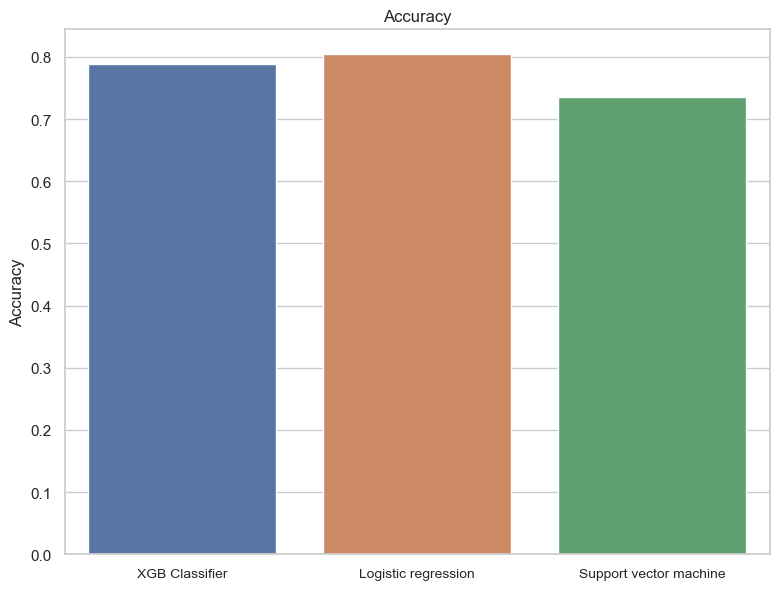

In [271]:
#visulizing Accuuracy with graph
fig = plt.gcf()
fig.set_size_inches(20, 15)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

Feature importances:
gender: 0.057208169251680374
SeniorCitizen: 0.06314512342214584
Partner: 0.08417437970638275
Dependents: 0.09596376866102219
PhoneService: 0.11496710777282715
MultipleLines: 0.12260133028030396
PaperlessBilling: 0.12526118755340576
MonthlyCharges: 0.14148777723312378
TotalCharges: 0.1951911449432373


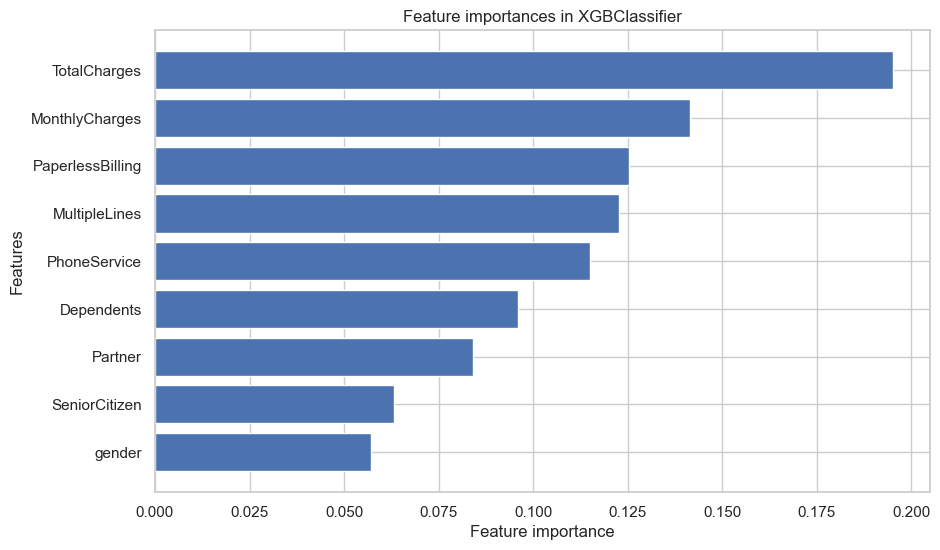

In [272]:
# Get the feature importances
feature_importances = xgb_classifier.feature_importances_

# Sort the feature importances
sorted_feature_importances = np.sort(feature_importances)

# Get the feature names
feature_names = X.columns

# Print the feature importances in descending order
print('Feature importances:')
for i, importance in enumerate(sorted_feature_importances):
    print('{}: {}'.format(feature_names[i], importance))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, sorted_feature_importances)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('Feature importances in XGBClassifier')
plt.show()

Model pkl file for Deployment

In [279]:
import pickle 

In [280]:
file = open("model.pkl",'wb' )
pickle.dump(logistic_clf,file)